# Type Case Study : Colors and Images¶

To run this notebook, we need these packages:

- `Colors`
- `Images`
- `FileIO`
- `TestImages`

# Complex types

In this notebook, we will study the types which are useful to manipulate image and color data.

Conceptually speaking,

- Image

  An image is a rectangular grid (i.e. matrix) of `pixels` (picture elements). The pixels in the matrix representing an image can be stored top-down or bottom-up, row by row.
  
  In turn, a pixel has a color or gray level.
  
  
- Color

  https://www.merriam-webster.com/dictionary/color
  
  "The aspect of the appearance of objects and light sources that may be described in terms of hue, lightness, and saturation (HLS) for objects and hue, brightness, and saturation for light sources"
  
  

Thus, in Julia, in order to handle image data, we need to define Types for both Image and Color. As you can expect, these Types are rather complex. 

In [ ]:
using TestImages, Images, FileIO, Colors

## Read some images from TestImages 

Read a color image:

In [ ]:
color_img = testimage("mandril_color.tif")

Find some info about the iamage using:

- `typeof`
- `size`
- `length`
- `sizeof`

In [ ]:
typeof(color_img), size(color_img), length(color_img),sizeof(color_img)

### Notes

1. The Type, `RGB{N0f8}`, is a commonly used Color Type for color Image pixel.

2. `RGB{T}` is a parametirc Type defined in `ColorTypes.jl` which is reexport by `Colors`.

3. The parameter `T` in note 2 can be of any numeric types in the range [0,1] including the Types defined in `FixedPointNumbers.jl` for fixed point arithmetic.

4. `N0f8` is a Type defined in `FixedPointNumbers.jl` using normalized UInt8 to representing numbers in the range [0, 1].

5. Some examples of possible 'T` in `RGB{T}` include:
- `RGB{Float32}`
- `RGB{Float64}`
- `RGB{N0f8}`

6. However, `RGB{UInt64}` is not allowed. Why?

### Read a gray image

In [ ]:
gray_img = testimage("mandril_gray.tif")

In [ ]:
typeof(gray_img), size(gray_img), length(gray_img),sizeof(gray_img)

### Load image data from image files

In [ ]:
img = load("bobby.jpg")

In [ ]:
typeof(img)

### Load `png` file

In [ ]:
img = load("girl.png")

In [ ]:
typeof(img)

# Color Types

https://github.com/JuliaGraphics/ColorTypes.jl

This "minimalistic" package, `ColorTypes.jl`, serves as the foundation for working with `colors` in Julia. It defines basic color types and their constructors, and sets up traits and show methods to make them easier to work with.

Of related interest is the `Colors.jl` package, which provides "colorimetry" and conversion functions for working with colors. You may also be interested in the `ColorVectorSpace.jl` package, which defines mathematical operations for certain color types. Both of these packages are based on ColorTypes, which ensures that any color objects will be broadly usable.

(Note: `Colors.jl` depends on `olorTypes.jl`, When `Colors.jl is using, it `reexport` `ColorTypes.jl`)
    

### Types available in ColorTypes

The type hierarchy and abstract types

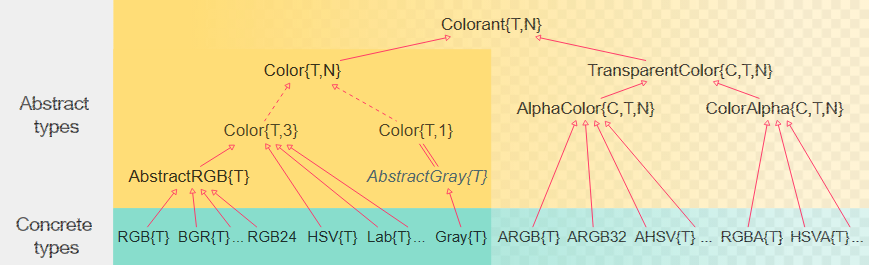


- `Colorant` is the general term used for any object exported by this package. True colors are called Color; TransparentColor indicates an object that also has alpha-channel information.

- `Color{T,3}` is a 3-component color (like RGB = red, green, blue); Color{T,1} is a 1-component color (i.e., grayscale). AbstractGray{T} is a typealias for Color{T,1}.

- Most colors have both AlphaColor and ColorAlpha variants; for example, RGB has both ARGB and RGBA. These indicate different underlying storage in memory: AlphaColor stores the alpha-channel first, then the color, whereas ColorAlpha stores the color first, then the alpha-channel. Storage order can be particularly important for interfacing with certain external libraries (e.g., OpenGL and Cairo).

- To support generic programming, `TransparentColor` constructors always take the alpha channel last, independent of their internal storage order. That is, one uses

1. `RGBA(red, green, blue, alpha)`
2. `ARGB(red, green, blue, alpha)` # note alpha is last
3. `RGBA(RGB(red, green, blue), alpha)`
4. `ARGB(RGB(red, green, blue), alpha)`
T
his way you can write code with a generic C<:Colorant type and not worry about the proper order for supplying arguments to the constructor. See the traits section for some useful utilities.



### Colors
RGB plus BGR, XRGB, RGBX, and RGB24: the AbstractRGB group
The sRGB colorspace.

`struct RGB{T} <: AbstractRGB{T}
    r::T # Red in [0,1]
    g::T # Green in [0,1]
    b::T # Blue in [0,1]
end`

RGBs may be defined with two broad number types: AbstractFloat and FixedPoint. FixedPoint types come from the FixedPointNumbers package, and essentially reinterpret "integers" (meaning, the bit-sequences used to represent machine integers) as fractional numbers. For example, N0f8(1) creates a Normed{UInt8,8} (N0f8 for short) number with value equal to 1.0 but which is represented internally with the same bit sequence as 0xff (which is numerically equal to 255). This strategy ensures that 1 always means "saturated color", regardless of whether that value is represented as a Float64 or with just 8 bits. (In the context of image-processing, this unifies "integer images" and "floating-point images" in a common scale.) A bright red color is created with RGB(1, 0, 0), a pale pink with RGB(1, 0.7, 0.7) or its 24-bit variant RGB{N0f8}(1, 0.7, 0.7), and RGB(255, 0, 0) throws an error.

The analogous BGR type is defined as

`struct BGR{T} <: AbstractRGB{T}
    b::T # Red in [0,1]
    g::T # Green in [0,1]
    r::T # Blue in [0,1]
end`

i.e., identical to RGB except in the opposite storage order. One crucial point: for all AbstractRGB types, the constructor accepts values in the order (r,g,b) regardless of how they are arranged internally in memory.

XRGB and RGBX seem exactly like RGB, but internally they insert one extra ("invisible") padding element; when the element type is N0f8, these have favorable memory alignment for interfacing with libraries like OpenGL.

Finally, one may encode an RGB or ARGB color as 8-bit values packed into a 32-bit integer:

`struct RGB24 <: AbstractRGB{N0f8}
    color::UInt32
end`

`struct ARGB32 <: AbstractARGB{N0f8}
    color::UInt32
end`

`

In [ ]:
img_rgb_64 = rand(RGB, 2, 2)

In [ ]:
typeof(img_rgb_64), sizeof(img_rgb_64)

In [ ]:
img_rgb_32 = rand(RGB{Float32}, 2, 2)

In [ ]:
typeof(img_rgb_32), sizeof(img_rgb_32)

In [ ]:
dump(img_rgb_32)

In [ ]:
img_rgb_8 = RGB{N0f8}.(img_rgb_32)

In [ ]:
img_rgb_8 = Matrix{RGB{N0f8}}(img_rgb_32) # same result as last cell

In [ ]:
typeof(img_rgb_8), sizeof(img_rgb_8)

In [ ]:
dump(img_rgb_8)

### HSV
Hue-Saturation-Value. A common projection of RGB to cylindrical coordinates. This is also sometimes called "HSB" for Hue-Saturation-Brightness.


`struct HSV{T} <: Color{T,3}
    h::T # Hue in [0,360]
    s::T # Saturation in [0,1]
    v::T # Value in [0,1]
end`

In [ ]:
h = HSV(RGB{Float32}(1,0,0))

In [ ]:
dump(h)

In [ ]:
c = RGB{Float32}(h)

In [ ]:
dump(c)

In [ ]:
dump(HSV(RGB{Float32}(0.5f0,0.7f0,0)))

### Lab

A perceptually uniform colorspace standardized by the CIE in 1976. See also Luv, the associated colorspace standardized the same year.

`struct Lab{T} <: Color{T,3}
    l::T # Lightness in [0,100]
    a::T # Red/Green
    b::T # Blue/Yellow
end`

In [ ]:
c = RGB{Float32}(1,1,1);

In [ ]:
typeof(c)

In [ ]:
h = Lab{Float64}(c);

In [ ]:
typeof(h)

### FixedPointNumbers.jl

https://juliapackages.com/p/fixedpointnumbers

A fixed-point number represents a fractional, or non-integral, number. In contrast with the more widely known floating-point numbers, with fixed-point numbers the decimal point doesn't "float": fixed-point numbers are effectively integers that are interpreted as being scaled by a constant factor. Consequently, they have a fixed number of digits (bits) after the decimal (radix) point.

Fixed-point numbers can be used to perform arithmetic. Another practical application is to implicitly rescale integers without modifying the underlying representation.

This library exports two categories of fixed-point types. Fixed-point types are used like any other number: they can be added, multiplied, raised to a power, etc. In some cases these operations result in conversion to floating-point types.

This library defines an abstract type 

`FixedPoint{T <: Integer, f}` as a subtype of Real. 

The parameter T is the underlying machine representation and f is the number of fraction bits.

For `T<:Signed` (a signed integer), there is a fixed-point type `Fixed{T, f}`; for `T<:Unsigned` (an unsigned integer), there is the `Normed{T, f}` type. However, there are slight differences in behavior that go beyond signed/unsigned distinctions.

The `Fixed{T,f}` types use 1 bit for sign, and f bits to represent the fraction. For example, Fixed{Int8,7} uses 7 bits (all bits except the sign bit) for the fractional part. The value of the number is interpreted as if the integer representation has been divided by 2^f. Consequently, Fixed{Int8,7} numbers x satisfy

`-1.0 = -128/128 ≤ x ≤ 127/128 ≈ 0.992.`

In contrast, the `Normed{T,f}`, with f fraction bits, map the closed interval [0.0,1.0] to the span of numbers with f bits. For example, the `N0f8` type (aliased to `Normed{UInt8,8}`) is represented internally by a UInt8, and makes 0x00 equivalent to 0.0 and 0xff to 1.0. Consequently, Normed numbers are scaled by 2^f-1 rather than 2^f. The type aliases `N6f10`, `N4f12`, `N2f14`, and `N0f16` are all based on UInt16 and reach the value 1.0 at 10, 12, 14, and 16 bits, respectively (0x03ff, 0x0fff, 0x3fff, and 0xffff). The NXfY notation is used for compact printing and the fY component informs about the number of fractional bits and X+Y equals the number of underlying bits used.

### Computation with Fixed and Normed numbers

You can perform mathematical operations with FixedPoint numbers, but keep in mind that they are vulnerable to both `rounding` and `overflow`. For example:

In [ ]:
using FixedPointNumbers

In [ ]:
x = N0f8(0.8)

In [ ]:
y = float(x) + x

In [ ]:
typeof(y)

In [ ]:
z = x + x # overflow

In [ ]:
typeof(z)

In [ ]:
x = eps(N0f8) # smallest nonzero `N0f8` number

In [ ]:
x*x   # underflow

### Using N0f8 for Colors

In [ ]:
c = RGB{N0f8}(1,0,0)

In [ ]:
typeof(c), sizeof(c)

In [ ]:
dump(c)

# Image Types (as defined in `Images.jl`)

https://juliaimages.org/latest/

In Julia, an image is just an `Array` with numeric elements in[0,1], and many of the ways you manipulate images come from the general methods to work with multidimensional arrays. 

For example,

In [ ]:
img1 = rand(Gray{N0f8}, 2, 2)

In [ ]:
typeof(img1), length(img1), sizeof(img1) # use sizeof to check storage bytes overhead

In [ ]:
dump(img1)

In [ ]:
display(MIME("text/plain"), img1)

In [ ]:
img2 = rand(RGB{N0f8}, 2, 2)

In [ ]:
typeof(img2), length(img2), sizeof(img2) # use sizeof to check storage bytes overhead

In [ ]:
typeof(img2[1,1])

In [ ]:
dump(img2)

In [ ]:
display(MIME("text/plain"), img2)

In [ ]:
img2[1,1] = RGB{N0f8}(1,0,0);  # set pixel[1,1] to red

In [ ]:
img2

In [ ]:
display(MIME("text/plain"), img2)

In [ ]:
img3 = rand(RGB{Float32}, 2, 2)

In [ ]:
typeof(img3), length(img3), sizeof(img3) # use sizeof to check storage bytes overhead

In [ ]:
dump(img3)

In [ ]:
# Get pixel's red channel
img3[1,1].r, red(img3[1,1])

In [ ]:
img4 = rand(RGB{Int32}, 2,2)   # doesn't work; Why?

In [ ]:
img4 = rand(RGB{Float32}, 2,2);
img4 = RGB24.(img4)

In [ ]:
typeof(img4), length(img4), sizeof(img4) # use sizeof to check storage bytes overhead

In [ ]:
?RGB24

##  Image Data Manipulations

In [ ]:
rgb_image = testimage("lighthouse")

In [ ]:
typeof(rgb_image), size(rgb_image), sizeof(rgb_image)

In [ ]:
rgb_image2 = testimage("mandril_color.tif")

In [ ]:
typeof(rgb_image2), size(rgb_image2), sizeof(rgb_image)

#### Get sub-image of an image

In [ ]:
rgb_image1 = rgb_image[:,1:512]

### Convert color image to gray image

In [ ]:
function RGB2Gray(rgb::RGB{N0f8}, rw = 0.299, gw = 0.587, bw = 0.114)
    g = rw * rgb.r + gw * rgb.g + bw * rgb.b
    Gray{N0f8}(g)
end

In [ ]:
img1 = RGB2Gray.(rgb_image)

In [ ]:
img2 = RGB2Gray.(rgb_image, 1.0/3, 1.0/3, 1.0/3)

In [ ]:
mosaicview(rgb_image, img1, img2; nrow=1)

### HSV Manipulation

In [ ]:
rgb_image = testimage("lighthouse")

In [ ]:
typeof(rgb_image), sizeof(rgb_image)

In [ ]:
hsv_image = Matrix{HSV{Float32}}(rgb_image)

In [ ]:
typeof(hsv_image), sizeof(hsv_image)

In [ ]:
function HSV_transf(hsv::HSV{Float32}, hw = 1, sw = 1, vw = 1)
    HSV{Float32}(hw * hsv.h, sw*hsv.s, vw*hsv.v)
end

In [ ]:
HSV_transf.(hsv_image, 0.1, 1, 1)

In [ ]:
HSV_transf.(hsv_image, 1, 0.5, 1)

In [ ]:
HSV_transf.(hsv_image, 1, 1, 0.5)

In [ ]:
mosaicview(hsv_image,
           HSV_transf.(hsv_image, 0.8, 1, 1),
           HSV_transf.(hsv_image, 0.6, 1, 1), 
           HSV_transf.(hsv_image, 0.1, 1, 1); 
        nrow=1)

In [ ]:
mosaicview(hsv_image,
           HSV_transf.(hsv_image, 1, 0.8, 1),
           HSV_transf.(hsv_image, 1, 0.6, 1), 
           HSV_transf.(hsv_image, 1, 0.1, 1); 
        nrow=1)

In [ ]:
mosaicview(hsv_image,
           HSV_transf.(hsv_image, 1, 1, 0.8),
           HSV_transf.(hsv_image, 1, 1, 0.6), 
           HSV_transf.(hsv_image, 1, 1, 0.1); 
        nrow=1)

### Image pixel color transformations

In [ ]:
function RGB2BGR(rgb::RGB{N0f8})
    RGB{N0f8}(rgb.b, rgb.g, rgb.r)
end

In [ ]:
RGB2BGR.(rgb_image)

In [ ]:
function RGB_filter(rgb::RGB{N0f8}, rf = 1.0, gf = 1.0, bf = 1.0)
    RGB{N0f8}(rf * rgb.b, gf * rgb.g, bf * rgb.r)
end

In [ ]:
img1 = RGB_filter.(rgb_image, 1.0, 0, 0)

In [ ]:
img2 = RGB_filter.(rgb_image, 0, 1, 0)

In [ ]:
img3 = RGB_filter.(rgb_image, 0, 0, 1)

In [ ]:
mosaicview(img1, img2, img3; nrow=1)

In [ ]:
RGB_filter.(rgb_image, 0, 1, 1)

## Combinine two `RGB{N0f8}` images

In [ ]:
function comb_rgb(rgb1::RGB{N0f8}, rgb2::RGB{N0f8}, w1 = 0.5, w2 = 0.5)
    RGB{N0f8}(w1 * rgb1.r + w2 * rgb2.r, w1 * rgb1.g + w2 * rgb2.g, w1 * rgb1.b + w2 * rgb2.b)
end

In [ ]:
image1 = testimage("mandril_color.tif");
image2 = testimage("lighthouse");

In [ ]:
size(image1), size(image2)

In [ ]:
image2_512 = @view image2[1:512, 1:512] 

In [ ]:
image3 = comb_rgb.(image1, image2_512)

In [ ]:
mosaicview(image1, image2_512, image3; nrow=1)

### Change color types of an image

For computational manipulations of image data (considering `efficency`, `accuracy`, and `overflow/underfflow` issues), we may need to convert between `RGB{N0f8}` and `RGB{Float32}`, for example.

In [ ]:
image = testimage("mandril_color.tif");

In [ ]:
typeof(image), sizeof(image)

In [ ]:
image_32 = Matrix{RGB{Float32}}(image)

In [ ]:
(typeof(image), sizeof(image)) ,(typeof(image_32), sizeof(image_32))

### Read Image files

In [ ]:
readdir()

In [ ]:
girl = load("girl.png")

In [ ]:
typeof(girl), size(girl), sizeof(girl)

# Compute Mean Face

In [ ]:
cd("./faces")

In [ ]:
readdir()

In [ ]:
# Read all 16 .jpg files"
files = ["000001.jpg", "000002.jpg", "000001.jpg"]
images = []
for f in files
    push!(images, load(f))
end

In [ ]:
function mean(rgb1::RGB{N0f8}, rgb2::RGB{N0f8})
    w = N0f8(0.5)
    RGB{N0f8}(w*rgb1.r + w*rgb2.r, w*rgb1.g + w*rgb2.g, w*rgb1.b + w*rgb2.b)
end

In [ ]:
typeof(images[1]), size(images[1]), sizeof(images[1])

In [ ]:
mean_img = mean.(images[1], images[2])

In [ ]:
typeof(mean_img), size(mean_img), sizeof(mean_img)

In [ ]:
mosaicview(images[1], images[2], mean_img; nrow=1)

### Interesting problem : compute mean of a large collection of images

Three issues:

1. How to scan (or walk) a directory for desirable image files and load them into memory?


2. How to store a collection of image data in memory (RAM)?
- As a `Vector` of `Matrix{RGB{N0f8}}` or `Matrix{Gray{N0f8}}` elements (`Matrix{RGB{Float32}}`?)



- As a `3` dimensional `Array` of type

  `(Int64, RGB{N0f8}, RGB{N0f8})` or

  `(RGB{N0f8}, RGB{N0f8}, Int64)`,
  
  etc.


3. How to compute mean of a large collection of `RGB{N0f8}` values, `efficently`, `accurately`, and
   without `overflow/underflow`?